# Brahmanand Singh
# Association Analysis


 One Item set with support greater than 0.5 : 4 


Two Items set with Support greater than 0.5 :  4

Three Items set with Support greater than 0.5 : 0

In [34]:
import pandas as pd # data processing

#Read the input file
df = pd.read_csv("~/input.csv",quoting=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  11 non-null     int64 
 1   Items           11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


,Transaction_ID,Items
0,1,"{item1,item2,item3,item4,item5}"
1,2,"{item2,item4}"
2,3,"{item1,item2,item3,item5}"
3,4,{item2}
4,5,"{item2,item3,item4,item5}"
5,6,{item1}
6,7,"{item1,item2,item4,item5}"
7,8,"{item1,item3,item5}"
8,9,"{item1,item2,item3,item5}"
9,10,"{item2,item3}"


#Cleaning the items by removing the curly Braces ({})

In [35]:
df['Items']=df['Items'].str.replace('{','').str.replace('}','')
df

ipykernel_launcher:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


,Transaction_ID,Items
0,1,"item1,item2,item3,item4,item5"
1,2,"item2,item4"
2,3,"item1,item2,item3,item5"
3,4,item2
4,5,"item2,item3,item4,item5"
5,6,item1
6,7,"item1,item2,item4,item5"
7,8,"item1,item3,item5"
8,9,"item1,item2,item3,item5"
9,10,"item2,item3"


Dropping the transaction ID as this is not needed

In [36]:
df.drop(["Transaction_ID"], axis=1, inplace=True)

#Adding values in a list and then splitting them in order to encode them properly

In [37]:
transactions = [] 
for i in range(0,len(df)): 
    transactions.append(list(df.iloc[i,].values))
transactions


[['item1,item2,item3,item4,item5'],
 ['item2,item4'],
 ['item1,item2,item3,item5'],
 ['item2'],
 ['item2,item3,item4,item5'],
 ['item1'],
 ['item1,item2,item4,item5'],
 ['item1,item3,item5'],
 ['item1,item2,item3,item5'],
 ['item2,item3'],
 ['item1,item2,item3,item5']]

As all the items are coming as single element, need to split them for different elements

In [38]:
final_trans = [sublist[0].split(',') for sublist in transactions]
final_trans

[['item1', 'item2', 'item3', 'item4', 'item5'],
 ['item2', 'item4'],
 ['item1', 'item2', 'item3', 'item5'],
 ['item2'],
 ['item2', 'item3', 'item4', 'item5'],
 ['item1'],
 ['item1', 'item2', 'item4', 'item5'],
 ['item1', 'item3', 'item5'],
 ['item1', 'item2', 'item3', 'item5'],
 ['item2', 'item3'],
 ['item1', 'item2', 'item3', 'item5']]

Need to encode the values in 1/0 , or True Flase and then convert into dataframe
Making as an array

In [39]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(final_trans).transform(final_trans)
te_ary.astype("int")  #this will print the 1 or 0
# te_ary #this will print in True or False Format 

array([[1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 1, 0, 0],
       [1, 1, 1, 0, 1]])

# Displaying the final data, each items are encoded properly for True/false

In [40]:
final_df=pd.DataFrame(te_ary, columns=te.columns_)
final_df

,item1,item2,item3,item4,item5
0,True,True,True,True,True
1,False,True,False,True,False
2,True,True,True,False,True
3,False,True,False,False,False
4,False,True,True,True,True
5,True,False,False,False,False
6,True,True,False,True,True
7,True,False,True,False,True
8,True,True,True,False,True
9,False,True,True,False,False


In [41]:
final_df=pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
final_df

,item1,item2,item3,item4,item5
0,1,1,1,1,1
1,0,1,0,1,0
2,1,1,1,0,1
3,0,1,0,0,0
4,0,1,1,1,1
5,1,0,0,0,0
6,1,1,0,1,1
7,1,0,1,0,1
8,1,1,1,0,1
9,0,1,1,0,0


As we have data in Binary format in the DF, we can sum it and count the number of rows and then compute the percentage 
This will help in answering questions like which item is ordered most / least etc.

In [42]:
item_sum = final_df.sum().sort_values(ascending = False).reset_index().head()
item_sum.rename(columns={item_sum.columns[0]:'Item_name',item_sum.columns[1]:'Item_count'}, inplace=True)

In [43]:
# item percent and then cumulative percent.
tot_item_count = sum(final_df.sum()) # Answer is 34
item_sum['Item_percent'] = item_sum['Item_count']/tot_item_count
item_sum['Tot_percent'] = item_sum.Item_percent.cumsum()
item_sum.head() # List of items with cumulative percentage

,Item_name,Item_count,Item_percent,Tot_percent
0,item2,9,0.264706,0.264706
1,item1,7,0.205882,0.470588
2,item3,7,0.205882,0.676471
3,item5,7,0.205882,0.882353
4,item4,4,0.117647,1.000000


Text(0.5, 1.0, 'Item sales distribution')

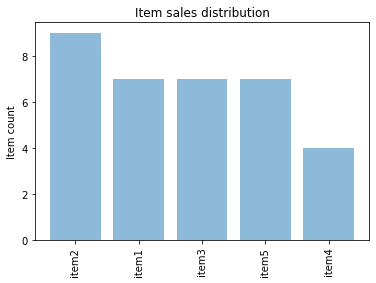

In [44]:
import matplotlib.pyplot as plt
import numpy as np
obj = (list(item_sum['Item_name'].head(n=20)))
y_pos = np.arange(len(obj))
performance = list(item_sum['Item_count'].head(n=20))


plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, obj, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

# From the above graph we can see the most sold Item is item2 and least sold item is Item4

Now data is ready, I am going to use MLXtend implementation of Apriori algorithm

In [45]:
from mlxtend.frequent_patterns import apriori, association_rules
# Applying the Apriori Algorithm and using column names for itemset
ap_out= apriori(final_df, min_support=0.0001,use_colnames=True)
ap_out.count()  #number of records in the dataframe

support     31
itemsets    31
dtype: int64

Need to count the number of item sets which are having single item and 2 items
We can generate the length column and then apply filter on that

In [46]:
#generating all the itemsets with min_support > 0.001 (so that all the combination gets listed)
frequent_itemsets = apriori(final_df, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.636364,(item1),1
1,0.818182,(item2),1
2,0.636364,(item3),1
3,0.363636,(item4),1
4,0.636364,(item5),1
5,0.454545,"(item1, item2)",2
6,0.454545,"(item3, item1)",2
7,0.181818,"(item4, item1)",2
8,0.545455,"(item1, item5)",2
9,0.545455,"(item3, item2)",2


In [47]:
# now , we can select the results that satisfy our desired criteria as follows:
# Itemsets with length 1 or 2 and support greater than 0.5

frequent_itemsets[ ((frequent_itemsets['length'] == 1) | (frequent_itemsets['length'] == 2)) & (frequent_itemsets['support'] >= 0.5) ]

,support,itemsets,length
0,0.636364,(item1),1
1,0.818182,(item2),1
2,0.636364,(item3),1
4,0.636364,(item5),1
8,0.545455,"(item1, item5)",2
9,0.545455,"(item3, item2)",2
11,0.545455,"(item5, item2)",2
13,0.545455,"(item3, item5)",2


In [48]:
out=frequent_itemsets[ ((frequent_itemsets['length'] == 1) | (frequent_itemsets['length'] == 2)) & (frequent_itemsets['support'] >= 0.5) ]
out.groupby(['length']).count()

,support,itemsets
length,,
1,4,4
2,4,4


# From above output we can conclude that we have 4 itemsets with confidence greater than 0.5 for one item and two items

In [49]:
# now , we can select the results that satisfy our desired criteria as follows:
# Itemsets with length 3 and support greater than 0.5

frequent_itemsets[ (frequent_itemsets['length'] == 3) & (frequent_itemsets['support'] >= 0.5) ]

# we are not having any itemset which is of length 3 and support value greater or equal to 0.5

,support,itemsets,length


In [50]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ]

,support,itemsets,length
15,0.363636,"(item3, item1, item2)",3
16,0.181818,"(item4, item1, item2)",3
17,0.454545,"(item1, item5, item2)",3
18,0.090909,"(item4, item3, item1)",3
19,0.454545,"(item3, item1, item5)",3
20,0.181818,"(item4, item1, item5)",3
21,0.181818,"(item4, item3, item2)",3
22,0.454545,"(item3, item5, item2)",3
23,0.272727,"(item4, item5, item2)",3
24,0.181818,"(item4, item3, item5)",3


In [51]:
out=frequent_itemsets[ (frequent_itemsets['length'] == 3) ]
out.groupby(['length']).max()

,support,itemsets
length,,
3,0.454545,"(item4, item3, item5)"


# From above Dataset we can see that for 3 items max support is 0.45

Now running the association Rule package to get the support,confidence and lift

In [52]:
rule=association_rules(frequent_itemsets, metric='confidence', min_threshold=0.01, support_only=False)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(item1),(item2),0.636364,0.818182,0.454545,0.714286,0.873016,-0.066116,0.636364
1,(item2),(item1),0.818182,0.636364,0.454545,0.555556,0.873016,-0.066116,0.818182
2,(item3),(item1),0.636364,0.636364,0.454545,0.714286,1.122449,0.049587,1.272727
3,(item1),(item3),0.636364,0.636364,0.454545,0.714286,1.122449,0.049587,1.272727
4,(item4),(item1),0.363636,0.636364,0.181818,0.500000,0.785714,-0.049587,0.727273
...,...,...,...,...,...,...,...,...,...
175,(item5),"(item4, item3, item1, item2)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
176,(item1),"(item4, item3, item5, item2)",0.636364,0.181818,0.090909,0.142857,0.785714,-0.024793,0.954545
177,(item2),"(item4, item3, item1, item5)",0.818182,0.090909,0.090909,0.111111,1.222222,0.016529,1.022727
178,(item4),"(item3, item1, item5, item2)",0.363636,0.363636,0.090909,0.250000,0.687500,-0.041322,0.848485


# Now applying filter based on given association Rules
R1: {item1,item2} => {item3}

R2: {item3,item5} => {item2}

In [53]:
selected_rule1=rule[(rule['antecedents'] == {'item1', 'item2'}) & (rule['consequents']=={'item3'}) ] 
#selecting the required columns from the dataframe
selected_rule1[['antecedents','consequents','support','confidence','lift']]


,antecedents,consequents,support,confidence,lift
22,"(item1, item2)",(item3),0.363636,0.8,1.257143


In [54]:
selected_rule2=rule[(rule['antecedents'] == {'item3', 'item5'}) & (rule['consequents']=={'item2'}) ] 
#selecting the required columns from the dataframe
selected_rule2[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
62,"(item3, item5)",(item2),0.454545,0.833333,1.018519


# Combining the both the rules into single dataframe for comparision

In [55]:
frames = [selected_rule1,selected_rule2]
result=pd.concat(frames)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,"(item1, item2)",(item3),0.454545,0.636364,0.363636,0.800000,1.257143,0.074380,1.818182
62,"(item3, item5)",(item2),0.545455,0.818182,0.454545,0.833333,1.018519,0.008264,1.090909


# Based on the above output, we can see that Rule2 confidence value is more than Rule1 Confidence Value
the confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent
# Based on given data, we should go with Rule2 for better prediction of cross sale.

# Visualizing the metrics

# Support vs Confidence

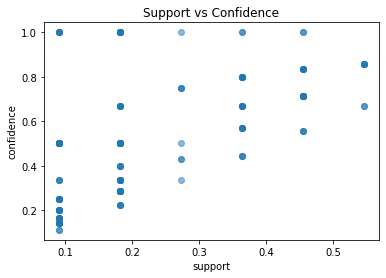

In [56]:
plt.scatter(rule['support'], rule['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Support vs Lift

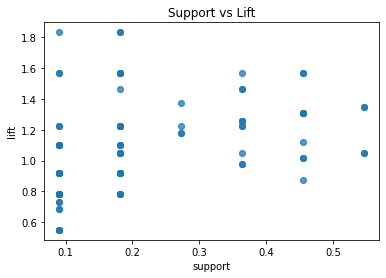

In [57]:
plt.scatter(rule['support'], rule['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Lift vs Confidence

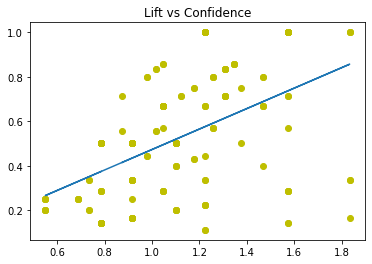

In [58]:
fit = np.polyfit(rule['lift'], rule['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('Lift vs Confidence')
plt.plot(rule['lift'], rule['confidence'], 'yo', rule['lift'], fit_fn(rule['lift']))